In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

import contractions
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(["&amp", "amp"])

import re 

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('washington_normal_2022.csv')

In [3]:
df

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/dcexaminer/status/16307191...,2023-02-28 23:58:49+00:00,newsom end california state emergency nearly t...,newsom end california state emergency nearly t...,1630719199935885313,https://twitter.com/dcexaminer,2,3,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='Newsom ends California COVI...,2008.0,NaN
1,https://twitter.com/layla_abouzaid/status/1630...,2023-02-28 23:58:18+00:00,question everybody making fun many people sayi...,question everybody making fun many people sayi...,1630719070419943424,https://twitter.com/layla_abouzaid,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN
2,https://twitter.com/foxnewspolitics/status/163...,2023-02-28 23:56:27+00:00,fbi director say covid pandemic likely origina...,fbi director say covid pandemic likely origina...,1630718606840299521,https://twitter.com/foxnewspolitics,10,11,32,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",5121.0,NaN
3,https://twitter.com/thehill/status/16307185169...,2023-02-28 23:56:06+00:00,john barrasso want congress debriefed energy d...,john barrasso want congress debriefed energy d...,1630718516906131456,https://twitter.com/thehill,12,7,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.0,NaN
4,https://twitter.com/NewsPolitics/status/163071...,2023-02-28 23:55:58+00:00,fbi director say covid pandemic likely origina...,fbi director say covid pandemic likely origina...,1630718483414540289,https://twitter.com/NewsPolitics,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",415.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,https://twitter.com/ryanstruyk/status/14796168...,2022-01-08 00:52:11+00:00,cnn people united state died coronavirus,cnn people united state died coronavirus,1479616891782107142,https://twitter.com/ryanstruyk,9,36,52,0,...,1.479588e+18,https://twitter.com/ryanstruyk,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
10145,https://twitter.com/Aly_Dar8/status/1479587485...,2022-01-07 22:55:20+00:00,cnn make differentiation variant testing coron...,cnn make differentiation variant testing coron...,1479587485416140802,https://twitter.com/Aly_Dar8,1,0,0,0,...,1.479587e+18,https://twitter.com/tylerindian,"[User(username='CNN', id=759251, displayname='...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
10146,https://twitter.com/GRevmgbrown4/status/147942...,2022-01-07 12:21:09+00:00,open smartnews read coronavirus omicron update...,open smartnews read coronavirus omicron update...,1479427886478151687,https://twitter.com/GRevmgbrown4,0,1,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=-77.064086, latitude=38....","Place(id='6417871953fa5e86', fullName='Silver ...",NaN,NaN,SummaryCard(title='Coronavirus omicron updates...,NaN,NaN
10147,https://twitter.com/AndrewSolender/status/1478...,2022-01-03 17:02:10+00:00,capitol physician say alert staff unprecedente...,capitol physician say alert staff unprecedente...,1478049054307373062,https://twitter.com/AndrewSolender,2,28,23,1,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

url                     0
date                    0
rawContent              0
renderedContent         0
id                      0
user                    0
replyCount              0
retweetCount            0
likeCount               0
quoteCount              0
conversationId          0
lang                    0
source                  0
sourceUrl               0
sourceLabel             0
links                7910
media                8316
retweetedTweet      10149
quotedTweet          8856
inReplyToTweetId     6202
inReplyToUser        6202
mentionedUsers       5115
coordinates          1303
place                1303
hashtags             8480
cashtags            10142
card                 8620
viewCount            7660
vibe                10115
dtype: int64

In [6]:
df['rawContent'].fillna('', inplace=True)
df['renderedContent'].fillna('', inplace=True)

In [7]:
## remove specific word HTTP
df['rawContent'] = df['rawContent'].str.replace('covid', '')
df['rawContent'] = df['rawContent'].str.replace('coronavirus', '')

df['renderedContent'] = df['renderedContent'].str.replace('covid', '')
df['renderedContent'] = df['renderedContent'].str.replace('coronavirus', '')

df['rawContent'] = df['rawContent'].str.replace('amp', '')
df['renderedContent'] = df['renderedContent'].str.replace('amp', '')

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

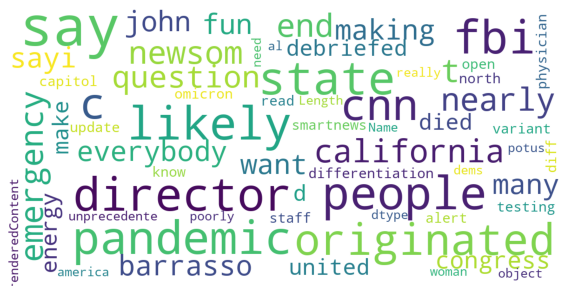

In [9]:
show_wordcloud(df["renderedContent"])

In [10]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [11]:
data = df['renderedContent'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['newsom', 'end', 'california', 'state', 'emergency', 'nearly', 'three', 'year', 'later']


## Building Bi-gram and Tri-gram Models

In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [13]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [14]:
data_words_bigrams = make_bigrams(data_words)
data_words_bigrams

[['newsom',
  'end',
  'california',
  'state',
  'emergency',
  'nearly',
  'three',
  'year',
  'later'],
 ['question',
  'everybody',
  'making',
  'fun',
  'many',
  'people',
  'saying',
  'thing',
  'started',
  'even',
  'said',
  'scientist',
  'said',
  'lab',
  'source',
  'lying',
  'scientist',
  'late'],
 ['fbi', 'director', 'say', 'pandemic', 'likely_originated', 'chinese', 'lab'],
 ['john',
  'barrasso',
  'want',
  'congress',
  'debriefed',
  'energy_department',
  'intelligence'],
 ['fbi', 'director', 'say', 'pandemic', 'likely_originated', 'chinese', 'lab'],
 ['jennysfavpal',
  'vigilantfox',
  'martymakary',
  'read',
  'stuff',
  'jeffrey',
  'sack',
  'guy',
  'charge',
  'appointing',
  'scientist',
  'committee',
  'look',
  'origin',
  'fire',
  'scientist',
  'compromised',
  'lied'],
 ['meeting',
  'right',
  'able',
  'leave',
  'work',
  'client',
  'mentioned',
  'bunch',
  'folk',
  'office',
  'gone',
  'happy',
  'hour',
  'dropping',
  'like',
  'fly',

In [15]:
data_words_trigrams = make_trigrams(data_words)
data_words_trigrams

[['newsom',
  'end',
  'california',
  'state',
  'emergency',
  'nearly',
  'three',
  'year',
  'later'],
 ['question',
  'everybody',
  'making',
  'fun',
  'many',
  'people',
  'saying',
  'thing',
  'started',
  'even',
  'said',
  'scientist',
  'said',
  'lab',
  'source',
  'lying',
  'scientist',
  'late'],
 ['fbi', 'director', 'say', 'pandemic', 'likely_originated', 'chinese_lab'],
 ['john',
  'barrasso',
  'want',
  'congress',
  'debriefed',
  'energy_department',
  'intelligence'],
 ['fbi', 'director', 'say', 'pandemic', 'likely_originated', 'chinese_lab'],
 ['jennysfavpal',
  'vigilantfox',
  'martymakary',
  'read',
  'stuff',
  'jeffrey',
  'sack',
  'guy',
  'charge',
  'appointing',
  'scientist',
  'committee',
  'look',
  'origin',
  'fire',
  'scientist',
  'compromised',
  'lied'],
 ['meeting',
  'right',
  'able',
  'leave',
  'work',
  'client',
  'mentioned',
  'bunch',
  'folk',
  'office',
  'gone',
  'happy',
  'hour',
  'dropping',
  'like',
  'fly',
  'me

## Building rough LDA model 

In [16]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [17]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [18]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"test" + 0.014*"one" + 0.012*"today" + 0.012*"get" + 0.009*"mask" + '
  '0.008*"day" + 0.006*"positive" + 0.006*"center" + 0.006*"vaccine" + '
  '0.006*"booster_rapid"'),
 (1,
  '0.012*"like" + 0.012*"people" + 0.011*"got" + 0.009*"time" + 0.008*"year" + '
  '0.007*"get" + 0.007*"mask" + 0.007*"know" + 0.006*"back" + 0.006*"one"'),
 (2,
  '0.010*"death" + 0.007*"would" + 0.007*"new" + 0.004*"state" + '
  '0.004*"vaccine" + 0.004*"american" + 0.004*"right" + 0.004*"people" + '
  '0.003*"year" + 0.003*"usa"'),
 (3,
  '0.024*"vaccine" + 0.008*"death" + 0.007*"case" + 0.006*"new" + '
  '0.006*"china" + 0.006*"say" + 0.005*"million" + 0.005*"testing" + '
  '0.005*"pandemic" + 0.004*"school"'),
 (4,
  '0.012*"biden" + 0.009*"trump" + 0.008*"pandemic" + 0.006*"china" + '
  '0.005*"people" + 0.004*"say" + 0.004*"president" + 0.004*"origin" + '
  '0.004*"would" + 0.004*"right"')]


In [19]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3155916293644891


## Tuning based on number of topics

In [20]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
       
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    # Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

coherence_scores = []
model_topics = []

for k in range(2, 20):
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k) 
    model_topics.append(k)    
    coherence_scores.append(cv)    
    print("#Topics: " + str(k) + ", Score: " + str(coherence_scores[-1]))

print(datetime.datetime.now())

2023-03-12 03:19:58.781916
#Topics: 2, Score: 0.23761581053237762
#Topics: 3, Score: 0.2568610788154358
#Topics: 4, Score: 0.27076130859356595
#Topics: 5, Score: 0.2798791957850736
#Topics: 6, Score: 0.31198271739352984
#Topics: 7, Score: 0.30390960531250116
#Topics: 8, Score: 0.3412410208912682
#Topics: 9, Score: 0.35441781760420504
#Topics: 10, Score: 0.32449908266762506
#Topics: 11, Score: 0.33882556374048517
#Topics: 12, Score: 0.35928759420559836
#Topics: 13, Score: 0.36171391338657405
#Topics: 14, Score: 0.3886035169353373
#Topics: 15, Score: 0.39904465363685093
#Topics: 16, Score: 0.40264860057247864
#Topics: 17, Score: 0.40041214165189165
#Topics: 18, Score: 0.38341792879921016
#Topics: 19, Score: 0.4098263938342555
2023-03-12 03:30:30.834714


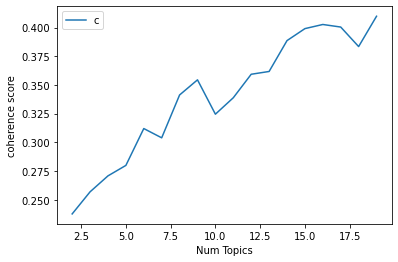

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence score"), loc='best')
plt.show()

In [22]:
end here

SyntaxError: invalid syntax (<ipython-input-22-9bcc9ab561c7>, line 1)

### Final Model

In [21]:
num_topics = 19

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)

In [22]:
# Save the LDA model

from gensim.test.utils import datapath

lda_model_saved_file = datapath("us_2022_lda_model_19")
lda_model.save(lda_model_saved_file)

In [23]:
score = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
score.get_coherence()

0.3820671305828689

In [24]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_model/washington_normal_2022_lda_vis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_vis/washington_normal_2022_lda_vis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9     -0.144571  0.053360       1        1  9.405605
18    -0.172235  0.081941       2        1  8.579735
6     -0.159991  0.018989       3        1  7.029704
13    -0.095308  0.015824       4        1  6.907592
1     -0.144484  0.014295       5        1  6.451538
11     0.058076  0.016729       6        1  6.260076
10    -0.063256 -0.135416       7        1  6.020145
0     -0.078810 -0.258420       8        1  5.654426
5      0.079475  0.057854       9        1  5.399170
7     -0.047762  0.120434      10        1  5.037451
3      0.055809 -0.074423      11        1  4.883479
17     0.104301  0.012620      12        1  4.739099
4      0.018506  0.097367      13        1  4.519014
12     0.059307 -0.024816      14        1  3.645090
16     0.137974  0.035566      15        1  3.532324
2      0.093761 -0.031108      16        1  3.321461
15     0.118227 -0.007049      17        1  3.241671
14     0.101390  0.024863      18        1  2.878325
8      0.079592 -0.018611      19        1  2.494095, topic_info=        Term         Freq        Total Category  logprob  loglift
494     test   744.000000   744.000000  Default  30.0000  30.0000
226  vaccine  1145.000000  1145.000000  Default  29.0000  29.0000
62       got   774.000000   774.000000  Default  28.0000  28.0000
99     today   545.000000   545.000000  Default  27.0000  27.0000
250     mask   794.000000   794.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
567    still    23.088289   695.960814  Topic19  -5.0387   0.2853
250     mask    20.780947   794.158476  Topic19  -5.1440   0.0480
121    would    19.910429   577.635859  Topic19  -5.1868   0.3235
497     time    19.937624   636.064344  Topic19  -5.1854   0.2286
292    since    17.365955   375.639716  Topic19  -5.3235   0.6171

[1272 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1115      6  0.072477    according
1115      8  0.217431    according
1115      9  0.688533    according
4035     16  0.908853   accurately
1912      2  0.140573          act
...     ...       ...          ...
2714      9  0.056484           yo
2714     12  0.903737           yo
5991      8  0.894934          yup
708      13  0.900778  zaleskiluke
839       6  0.932436      zealand

[3483 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 19, 7, 14, 2, 12, 11, 1, 6, 8, 4, 18, 5, 13, 17, 3, 16, 15, 9])

**Added Sentiment Analysis**

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
df["renderedContent"] = df['renderedContent'].apply(lambda tweet:str(tweet))
sentiment_scores = df['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        {'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'comp...
1        {'neg': 0.15, 'neu': 0.705, 'pos': 0.145, 'com...
2        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3        {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...
4        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                               ...                        
10144    {'neg': 0.383, 'neu': 0.319, 'pos': 0.298, 'co...
10145    {'neg': 0.083, 'neu': 0.759, 'pos': 0.159, 'co...
10146    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10147    {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...
10148    {'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...
Name: renderedContent, Length: 10149, dtype: object

In [28]:
# Load the saved model

from gensim.test.utils import datapath
lda_model_saved_file = datapath("us_2022_lda_model_19")
lda_model = gensim.models.ldamodel.LdaModel.load(lda_model_saved_file)

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
topics, num_topics = [], 19

for i in range(len(corpus)):
    top_topics = (
        lda_model.get_document_topics(corpus[i],
                                      minimum_probability=0.0))
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    topics.append(topic_vec.index(max(topic_vec))+1)
    
topics

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[3,
 8,
 6,
 5,
 6,
 4,
 15,
 16,
 3,
 2,
 6,
 16,
 19,
 17,
 1,
 18,
 13,
 17,
 10,
 4,
 10,
 1,
 11,
 2,
 7,
 7,
 8,
 1,
 16,
 15,
 19,
 16,
 16,
 5,
 18,
 6,
 16,
 13,
 8,
 4,
 18,
 8,
 8,
 18,
 9,
 12,
 4,
 1,
 10,
 6,
 15,
 5,
 1,
 8,
 11,
 12,
 5,
 6,
 7,
 17,
 19,
 3,
 10,
 15,
 6,
 9,
 1,
 17,
 16,
 16,
 17,
 18,
 6,
 5,
 18,
 11,
 5,
 6,
 10,
 10,
 6,
 19,
 15,
 7,
 9,
 6,
 12,
 4,
 12,
 4,
 15,
 2,
 12,
 15,
 14,
 12,
 6,
 16,
 14,
 12,
 13,
 11,
 2,
 8,
 7,
 6,
 12,
 12,
 3,
 7,
 10,
 19,
 10,
 17,
 10,
 11,
 13,
 13,
 5,
 18,
 2,
 1,
 19,
 10,
 5,
 7,
 3,
 10,
 14,
 5,
 8,
 5,
 7,
 15,
 10,
 4,
 6,
 9,
 7,
 11,
 18,
 8,
 18,
 13,
 4,
 8,
 5,
 1,
 11,
 10,
 15,
 6,
 12,
 2,
 18,
 8,
 6,
 15,
 13,
 9,
 10,
 16,
 2,
 18,
 19,
 1,
 4,
 3,
 2,
 18,
 8,
 9,
 6,
 5,
 12,
 2,
 13,
 13,
 10,
 4,
 18,
 19,
 18,
 16,
 13,
 6,
 3,
 4,
 6,
 5,
 6,
 6,
 12,
 12,
 6,
 14,
 5,
 16,
 14,
 13,
 18,
 18,
 10,
 18,
 12,
 1,
 14,
 16,
 3,
 1,
 6,
 8,
 10,
 17,
 16,
 14,
 8,
 13,
 3,
 4,
 15,
 4

In [30]:
df["Topic"] = topics
df.head()

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic
0,https://twitter.com/dcexaminer/status/16307191...,2023-02-28 23:58:49+00:00,newsom end california state emergency nearly t...,newsom end california state emergency nearly t...,1630719199935885313,https://twitter.com/dcexaminer,2,3,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='Newsom ends California COVI...,2008.0,NaN,3
1,https://twitter.com/layla_abouzaid/status/1630...,2023-02-28 23:58:18+00:00,question everybody making fun many people sayi...,question everybody making fun many people sayi...,1630719070419943424,https://twitter.com/layla_abouzaid,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,8
2,https://twitter.com/foxnewspolitics/status/163...,2023-02-28 23:56:27+00:00,fbi director say pandemic likely originated c...,fbi director say pandemic likely originated c...,1630718606840299521,https://twitter.com/foxnewspolitics,10,11,32,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",5121.0,NaN,6
3,https://twitter.com/thehill/status/16307185169...,2023-02-28 23:56:06+00:00,john barrasso want congress debriefed energy d...,john barrasso want congress debriefed energy d...,1630718516906131456,https://twitter.com/thehill,12,7,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.0,NaN,5
4,https://twitter.com/NewsPolitics/status/163071...,2023-02-28 23:55:58+00:00,fbi director say pandemic likely originated c...,fbi director say pandemic likely originated c...,1630718483414540289,https://twitter.com/NewsPolitics,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",415.0,NaN,6


In [31]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
df["Sentiment"] = sentiment_label
df.head()

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic,Sentiment
0,https://twitter.com/dcexaminer/status/16307191...,2023-02-28 23:58:49+00:00,newsom end california state emergency nearly t...,newsom end california state emergency nearly t...,1630719199935885313,https://twitter.com/dcexaminer,2,3,9,1,...,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='Newsom ends California COVI...,2008.0,NaN,3,Negative
1,https://twitter.com/layla_abouzaid/status/1630...,2023-02-28 23:58:18+00:00,question everybody making fun many people sayi...,question everybody making fun many people sayi...,1630719070419943424,https://twitter.com/layla_abouzaid,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,8,Negative
2,https://twitter.com/foxnewspolitics/status/163...,2023-02-28 23:56:27+00:00,fbi director say pandemic likely originated c...,fbi director say pandemic likely originated c...,1630718606840299521,https://twitter.com/foxnewspolitics,10,11,32,0,...,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",5121.0,NaN,6,Neutral
3,https://twitter.com/thehill/status/16307185169...,2023-02-28 23:56:06+00:00,john barrasso want congress debriefed energy d...,john barrasso want congress debriefed energy d...,1630718516906131456,https://twitter.com/thehill,12,7,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,14055.0,NaN,5,Positive
4,https://twitter.com/NewsPolitics/status/163071...,2023-02-28 23:55:58+00:00,fbi director say pandemic likely originated c...,fbi director say pandemic likely originated c...,1630718483414540289,https://twitter.com/NewsPolitics,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",415.0,NaN,6,Neutral


In [32]:
for content in df[(df["Topic"] == 11) & (df["Sentiment"] == "Negative")].renderedContent:
    print(content)

woody harrelson caused stir saturday night live monologue fake movie script included pandemic conspiracy contrary claim evidence nbc later edited anything monologue 
emergency  food fund set expire affect wallet
large published study cited mainstream press show link  vaxx miscarriage study faulty manipulating data somehow
caign national medical association department health human service partner raise awareness risk severe  available treatment read 
thursday march come receive free  booster flu vaccine communityldgngs fifer family learning center  booster available year older flu vaccine year older 
banned  subreddit sharing plausible notracist
labellemercure davidafrench look clear people vote biden people came drove vote trump voted trump voted hope trump complete bust lost handling  stupid tweet
nicolledwallace irwinredlenermd million people worldwide died  tried politicize poopyface nicolledwallace
realbrianeskow biden way new rule arbitrarily written  enforced duress  lockdown lik

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


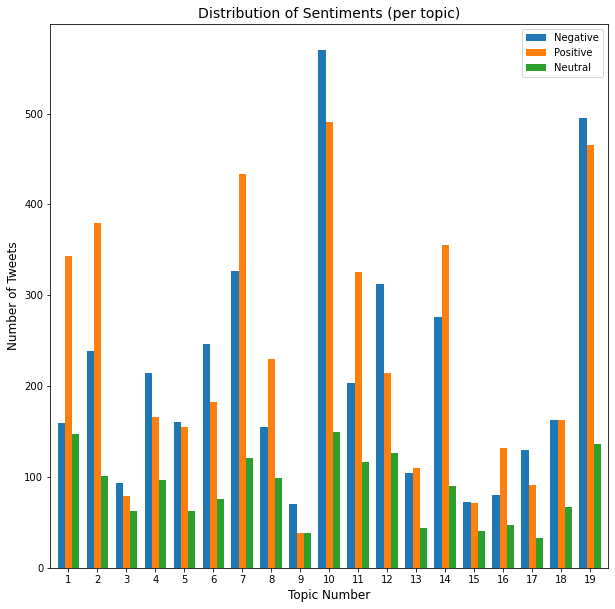

In [33]:
import matplotlib.pyplot as plt

topics = range(1, num_topics+1)
columns = ["Negative", "Positive", "Neutral"]
data = []

for i in range(num_topics):
    curr_topic = df[df["Topic"] == i+1]
    negative, positive, neutral = len(curr_topic[curr_topic["Sentiment"] == "Negative"]), len(curr_topic[curr_topic["Sentiment"] == "Positive"]), len(curr_topic[curr_topic["Sentiment"] == "Neutral"]) 
    data.append([negative, positive, neutral])

topic_sentiment_df = pd.DataFrame(data, columns=columns, index=topics)
topic_sentiment_df.plot(kind="bar", figsize=(10, 10), width=0.75)
plt.title("Distribution of Sentiments (per topic)", fontsize=14)
plt.xlabel("Topic Number", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.gca().xaxis.set_tick_params(rotation=0)
plt.show()

### Label Topics - LDA

In [34]:
import yake

kw_extractor = yake.KeywordExtractor(top=10, stopwords=stopwords)

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
topic_keyphrases = dict()

for i in range(num_topics):
    tweets = " ".join(df[df["Topic"] == i+1].renderedContent)
    topic_keyphrases[i+1] = [kp[0] for kp in kw_extractor.extract_keywords(tweets)]

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
keyphrase_column_names = [f"Keyphrase {i}" for i in range(1, 11)]
topic_keyphrases_df = pd.DataFrame.from_dict(topic_keyphrases, orient="index", columns=keyphrase_column_names)
topic_keyphrases_df

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Keyphrase 1,Keyphrase 2,Keyphrase 3,Keyphrase 4,Keyphrase 5,Keyphrase 6,Keyphrase 7,Keyphrase 8,Keyphrase 9,Keyphrase 10
1,rapid antigen test,test well pcr,antigen test well,well pcr test,pcr test one,icymi via resident,booster rapid antigen,test one today,via resident access,mask booster rapid
2,biden test positive,test feel like,still positive day,still feel like,day positive test,fauci test positive,take home test,home test thank,test came back,day negative test
3,lab leak theory,foxnews american die,american die everyday,food drug administration,nearly three year,emergency use authorization,emergency nearly three,approved food drug,tuesday nearly three,drug administration friday
4,create new vaccine,new vaccine variant,false information vaccine,new vaccine work,one china vaccinated,biden vaccine mandate,gop serious getting,christian kim gop,getting vaccine vaccine,kim gop candidate
5,inflation gas price,gas price soft,augefortrump sergiovengeance carignanabreu,jab inflation gas,price soft crime,student loan forgiveness,crime justice american,gas price inflation,justice american afghanistan,american afghanistan hunter
6,lab leak report,lab leak likely,lab leak theory,originated lab leak,leak likely origin,leak energy department,energy department concluded,lab leak origin,likely originated lab,chinese lab leak
7,neighbor washingtondc safe,neighbor make informed,unhoused neighbor make,keeping neighbor washingtondc,component keeping neighbor,informed decision health,decision health crucial,make informed decision,housed unhoused neighbor,health crucial component
8,last two year,two year pandemic,year finally got,time last year,three year pandemic,economy inflation gas,two year ago,million american died,year last year,year pandemic focus
9,get vaccinated boosted,opportunity get vaccinated,vaccinated boosted center,rico face staggering,supporter anti vaxxers,puerto rico face,reading trump supporter,trump supporter anti,pcr testing site,site note via
10,battle still end,conservative take right,got owned science,would mean got,still end succumbing,wonder drug ivermectin,right battle still,many people died,take right false,end public health
